# Module 4 Section 2 Lab 2 - Logistic Regression


## Objektif
- Apakah Linear Regression dapat digunakan untuk menyelesaikan tugas klasifikasi?
- Decision Boundary
- Fungsi Sigmoid

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

%matplotlib inline

In [22]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=10, n_features=1, n_informative=1, n_redundant=0 , n_clusters_per_class=1, flip_y=0, random_state=7)

In [23]:
X.shape

(10, 1)

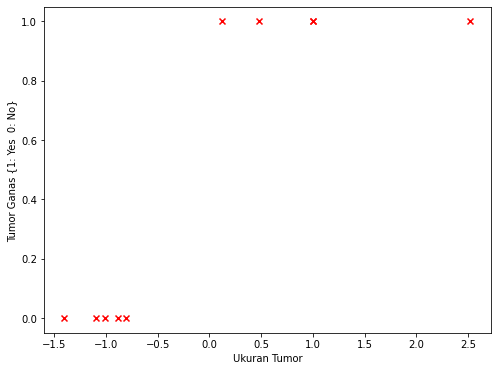

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(X, y, c='r', marker='x')
plt.ylabel("Tumor Ganas {1: Yes  0: No}")
plt.xlabel("Ukuran Tumor")
plt.show()

**Apa jenis tugas ini?**
- Output "y" memiliki dua kategori yaitu 1 (Ya) atau 0 (Tidak)
- Jadi, seperti yang telah kita pelajari sebelumnya, ini adalah **Tugas Klasifikasi** di mana kita menggunakan variabel dependen kita, dalam hal ini Ukuran Tumor dan mendapatkan output **biner** yaitu 1 (Ya) atau 0 ( Tidak)!

Mari kita dekati masalah ini dengan apa yang telah kita pelajari sejauh ini.

# Dapatkah Linear Regression digunakan untuk menyelesaikan tugas klasifikasi?

In [25]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

z = np.linspace(-2, 2, 1000)
z_predict = lin_reg.intercept_ + (lin_reg.coef_ * z)

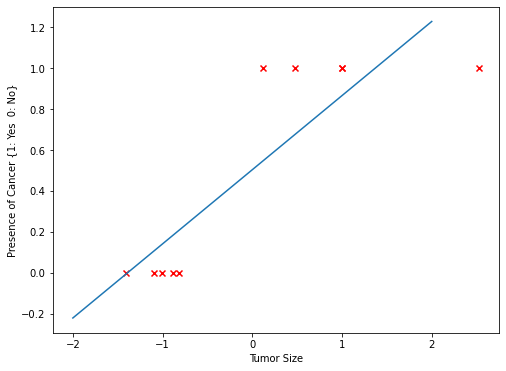

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(X, y, c='r', marker='x')
plt.plot(z, z_predict)
plt.ylabel("Presence of Cancer {1: Yes  0: No}")
plt.xlabel("Tumor Size")
plt.show()

## Intuisi Decision Boundary
Sebelumnya, kita telah membuat model *Linear Regression* yang diwakili oleh garis biru. Bagaimana kita mengubah keluaran kontinu menjadi keluaran diskrit? Salah satu cara yang bisa kita lakukan adalah menggunakan nilai ambang batas untuk output *Linear Regression*.

Output kita adalah 1 atau 0, dan karena kita bisa mendapatkan nilai prediksi antara 0 dan 1 seperti 0.2, 0.6, pada garis regresi, kita perlu menemukan metode di mana output kita (0.2, 0.6, dll) **diubah** menjadi **0** atau **1**

Ambang batas yang wajar untuk masalah biner (0 - 1) adalah 0.5. Jadi, jika nilai prediksi $y$ **lebih besar dari 0.5** akan di tetapkan sebagai **"1"** dan sebaliknya, jika $y$ **kurang dari 0.5** maka ditetapkan sebagai **"0"**.

Text(0, 0.5, 'Target')

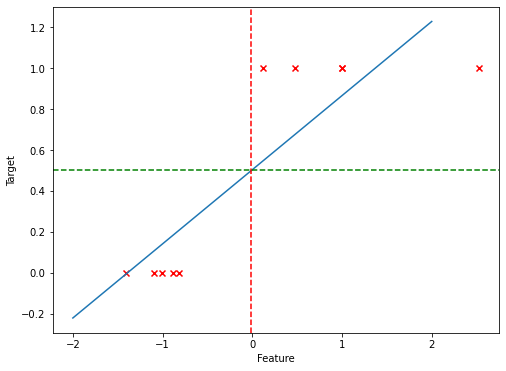

In [27]:
x_critical = (0.5 - lin_reg.intercept_)/ lin_reg.coef_

plt.figure(figsize=(8,6))
plt.scatter(X, y, c='r', marker='x')
plt.plot(z, z_predict)
plt.axvline(x=x_critical, color='r', linestyle='--')
plt.axhline(y=0.5, color='g', linestyle='--')
plt.xlabel('Feature')
plt.ylabel('Target')

## Linear Regression - Bukan Ide Bagus!
*Linear Regression* tidak kuat terhadap outlier dan itu mengubah kecocokan secara drastis dengan adanya outlier. Kita akan menambahkan outlier dan mempertahankan *decision boundary* yang sama seperti sebelumnya untuk melihat perbedaannya.

In [28]:
new_obs = 20
X = np.vstack([X, new_obs])
y = np.append(y, 1)

lin_reg = LinearRegression()
lin_reg.fit(X, y)

z = np.linspace(-2, new_obs, 1000)

z_predict = lin_reg.intercept_ + (lin_reg.coef_ * z)
x_critical2 = (0.5 - lin_reg.intercept_)/ lin_reg.coef_

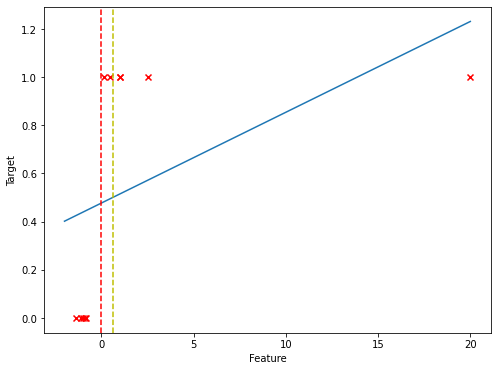

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(X, y, c='r', marker='x')
plt.plot(z, z_predict)
plt.axvline(x=x_critical, color='r', linestyle='--')
plt.axvline(x=x_critical2, color='y', linestyle='--')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

Pada grafik diatas, kita dapat melihat bahwa *decision boundary* telah bergeser ke kanan (garis kuning). Akibatnya, kita mendapatkan beberapa prediksi $y$ yang salah (prediksi yang terletak di sebelah kiri garis kuning).

Karena data diberi label, kita tahu bahwa awalnya adalah bernilai "1". Tetapi, karena menunjukkan berada di sebelah kiri *decision boundary*, data tersebut harus bernilai "0"

Jadi, *Linear Regression* tidak cocok untuk tugas klasifikasi karena sangat sensitif terhadap outlier. Kita  membutuhkan model yang lebih baik untuk menyelesaikan masalah klasifikasi.

# Logistic Regression
Untuk mengatasi keterbatasan *Linear Regression* kita akan menggunakan model lain yang cocok untuk klasifikasi yaitu, *Logistic Regression*.Apa yang kita butuhkan? Kita membutuhkan $0 <= y <= 1$.
  
Untuk itu, kita perlu menggunakan fungsi yang berbeda (dan bukan fungsi pada *Linear Regression*:  $y = mx + b$). Fungsi ini adalah **Fungsi Sigmoid**

## Fungsi Sigmoid
Kita perlu mendapatkan nilai dalam kisaran (0,1). Mari kita lihat grafik Fungsi Sigmoid dibawah ini:

<center><img src="https://raw.githubusercontent.com/bluedataconsulting/AIMasteryProgram/main/Lab_Exercises/Module4/images/sigmoid.png" style="width: 450px;"/></center>

Baca selanjutnya: https://github.com/drbilo/logistic-regression

- Fungsi grafik di atas adalah $g(z) = \frac {1} {(1 + e^(-z))}$ untuk nilai $z$ mulai dari - tak terhingga , + tak terhingga
- $g(z)$ juga disebut sebagai "Sigmoid dari 'z' atau hanya $sig(z)$"

Sekali lagi, mari kita mulai dengan memasukkan ujung jangkauannya seperti dibawah ini:

$$g(-infinity) = \frac {1} {(1 + infinity)} = ~0$$
 
$$g( infinity) = \frac {1} {(1 + ~0)} = ~1$$

Berapapun nilai $z$, kita akan selalu mendapatkan jawaban di kisaran **[0,1]**.

## Modifikasi
Sekarang, daripada $sig(z)$ mari kita pertimbangkan $sig(y)$, dimana $y$ adalah respon. Tetapi, seperti yang dibahas sebelumnya:
 
$$y = \theta_0 + \theta_1(x1) + \theta_2(x_2) + .. + \theta_n(x_n)$$
 
Jadi, 

$$g(y) = g(h_{\theta}(x)) = 1/(1 + e^{-(\theta* X)})$$

## Interprestasi Sederhana
$h_θ(x)$ adalah perkiraan probabilitas bahwa $y=1$ pada input $x$. Contoh: $h_θ(x)$ = 0,7 dalam masalah tumor berarti ada 70% kemungkinan tumor menjadi ganas.
 
Secara matematis, $h_θ(x) = P(y=1 | x; )$ berarti probabilitas bahwa $y = 1$ yang diberikan $x$ dan diparameterisasi oleh $\theta$. Jadi, $P(y=1 | x;θ) + P(y=0 | x;θ) = 1$.

Cukup matematikanya, sekarang coba kita terapkan pada masalah diatas.




In [30]:
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples=10, n_features=1, n_informative=1, n_redundant=0 , n_clusters_per_class=1, flip_y=0, random_state=7)

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

Text(0, 0.5, 'Target')

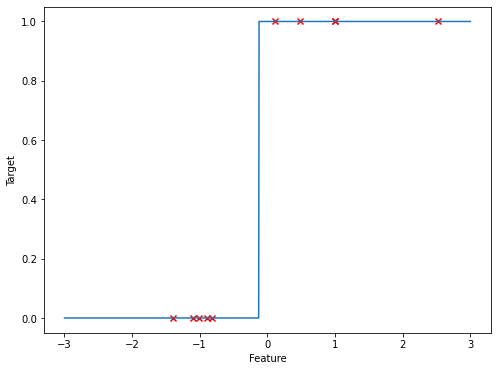

In [31]:
plt.figure(figsize=(8,6))
plt.scatter(X, y, c='r', marker='x')
xt = np.linspace(-3, 3, 1000).reshape(1000,1)
yt = log_reg.predict(xt)
plt.plot(xt, yt)
plt.xlabel('Feature')
plt.ylabel('Target')

Dalam kasus tanpa outlier, *Logistic Regression* melakukan pekerjaan yang baik dalam memisahkan kelas. Sekarang kita akan menambahkan outlier dan memeriksa apakah masih berhasil melakukan hal yang sama.

Text(0, 0.5, 'Target')

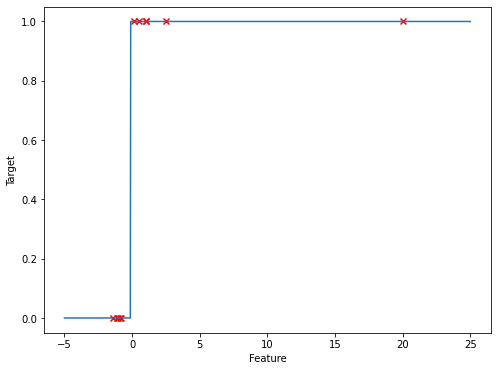

In [32]:
new_obs = 20
X = np.vstack([X, new_obs])
y = np.append(y, 1)

log_reg.fit(X, y)

plt.figure(figsize=(8,6))
plt.scatter(X, y, c='r', marker='x')
xt = np.linspace(-5, 25, 1000).reshape(1000,1)
yt = log_reg.predict(xt)
plt.plot(xt, yt)
plt.xlabel('Feature')
plt.ylabel('Target')

Bahkan setelah menambahkan outlier, *Logistic Regression* memisahkan kelas dengan baik. Maka, *Logistic Regression* jauh lebih cocok untuk tugas klasifikasi.